# ***An investigation of the role of virtual reality and its impact on student engagement and learning retention***

Dataset Link: https://www.kaggle.com/datasets/duyqun/virtual-reality-in-education-dataset

In [ ]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PDAN/Modified_Virtual_Reality_in_Education_Dataset.csv')
# dataset from kaggle.

# ***Exploratory Data Analysis (EDA)***

In [ ]:
df.head(5)
# displays the first 5 rows of the data

,Age,Grade_Level,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Instructor_VR_Proficiency,Access_to_VR_Equipment,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR
0,13,Postgraduate,Yes,8,5,Yes,Beginner,No,Low,Yes
1,16,Undergraduate,No,3,1,No,Intermediate,Yes,Low,No
2,15,High School,Yes,0,1,Yes,Advanced,Yes,Low,No
3,24,Postgraduate,Yes,10,4,Yes,Advanced,No,Low,Yes
4,22,Undergraduate,Yes,10,4,No,Intermediate,Yes,Low,Yes


In [ ]:
df.info(5)
# displays the first 5 rows of information for the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               5000 non-null   int64 
 1   Grade_Level                       5000 non-null   object
 2   Usage_of_VR_in_Education          5000 non-null   object
 3   Hours_of_VR_Usage_Per_Week        5000 non-null   int64 
 4   Engagement_Level                  5000 non-null   int64 
 5   Improvement_in_Learning_Outcomes  5000 non-null   object
 6   Instructor_VR_Proficiency         5000 non-null   object
 7   Access_to_VR_Equipment            5000 non-null   object
 8   Stress_Level_with_VR_Usage        5000 non-null   object
 9   Collaboration_with_Peers_via_VR   5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [ ]:
df.describe()
# discribes the rows of the data
# This is only integer object

,Age,Hours_of_VR_Usage_Per_Week,Engagement_Level
count,5000.000000,5000.00000,5000.000000
mean,21.182200,5.44460,2.463000
std,5.461957,4.21242,1.483061
min,12.000000,0.00000,1.000000
25%,16.000000,2.00000,1.000000
50%,21.000000,4.00000,2.000000
75%,26.000000,7.00000,4.000000
max,30.000000,37.00000,5.000000


In [ ]:
df.shape
# We can see the how many columns and rows we have in the dataset

(5000, 10)

In [ ]:
df.columns
# To check the correct spelling of the column names.

Index(['Age', 'Grade_Level', 'Usage_of_VR_in_Education',
       'Hours_of_VR_Usage_Per_Week', 'Engagement_Level',
       'Improvement_in_Learning_Outcomes', 'Instructor_VR_Proficiency',
       'Access_to_VR_Equipment', 'Stress_Level_with_VR_Usage',
       'Collaboration_with_Peers_via_VR'],
      dtype='object')

In [ ]:
num_col = df.select_dtypes(exclude='object')
num_col.columns
# Displaying numerical values.

Index(['Age', 'Hours_of_VR_Usage_Per_Week', 'Engagement_Level'], dtype='object')

In [ ]:
cal_col = df.select_dtypes(include='object')
cal_col.columns
# Displaying categorical values.

Index(['Grade_Level', 'Usage_of_VR_in_Education',
       'Improvement_in_Learning_Outcomes', 'Instructor_VR_Proficiency',
       'Access_to_VR_Equipment', 'Stress_Level_with_VR_Usage',
       'Collaboration_with_Peers_via_VR'],
      dtype='object')

In [ ]:
df.isnull().sum()
# Checking for any null values
# There is no null values in this dataset.

,0
Age,0
Grade_Level,0
Usage_of_VR_in_Education,0
Hours_of_VR_Usage_Per_Week,0
Engagement_Level,0
Improvement_in_Learning_Outcomes,0
Instructor_VR_Proficiency,0
Access_to_VR_Equipment,0
Stress_Level_with_VR_Usage,0
Collaboration_with_Peers_via_VR,0


In [ ]:
df.isna().sum()
# Checking for any missing values
# There is no missing values in this dataset.

,0
Age,0
Grade_Level,0
Usage_of_VR_in_Education,0
Hours_of_VR_Usage_Per_Week,0
Engagement_Level,0
Improvement_in_Learning_Outcomes,0
Instructor_VR_Proficiency,0
Access_to_VR_Equipment,0
Stress_Level_with_VR_Usage,0
Collaboration_with_Peers_via_VR,0


In [ ]:
duplicates = df[df.duplicated()]
# Checking if there is any duplicate values
print(duplicates)
# Displaying duplicate value
# The duplicates will not be droped since there are 2 different ages and it can be possiable.

      Age    Grade_Level Usage_of_VR_in_Education  Hours_of_VR_Usage_Per_Week  \
179    16   Postgraduate                      Yes                           6   
294    29  Undergraduate                      Yes                           6   
484    21   Postgraduate                      Yes                           7   
490    23    High School                      Yes                           3   
716    13  Undergraduate                      Yes                           3   
...   ...            ...                      ...                         ...   
4920   26  Undergraduate                      Yes                           9   
4935   30   Postgraduate                      Yes                           0   
4940   12   Postgraduate                      Yes                           1   
4962   26   Postgraduate                      Yes                           5   
4964   21  Undergraduate                       No                           0   

      Engagement_Level Impr

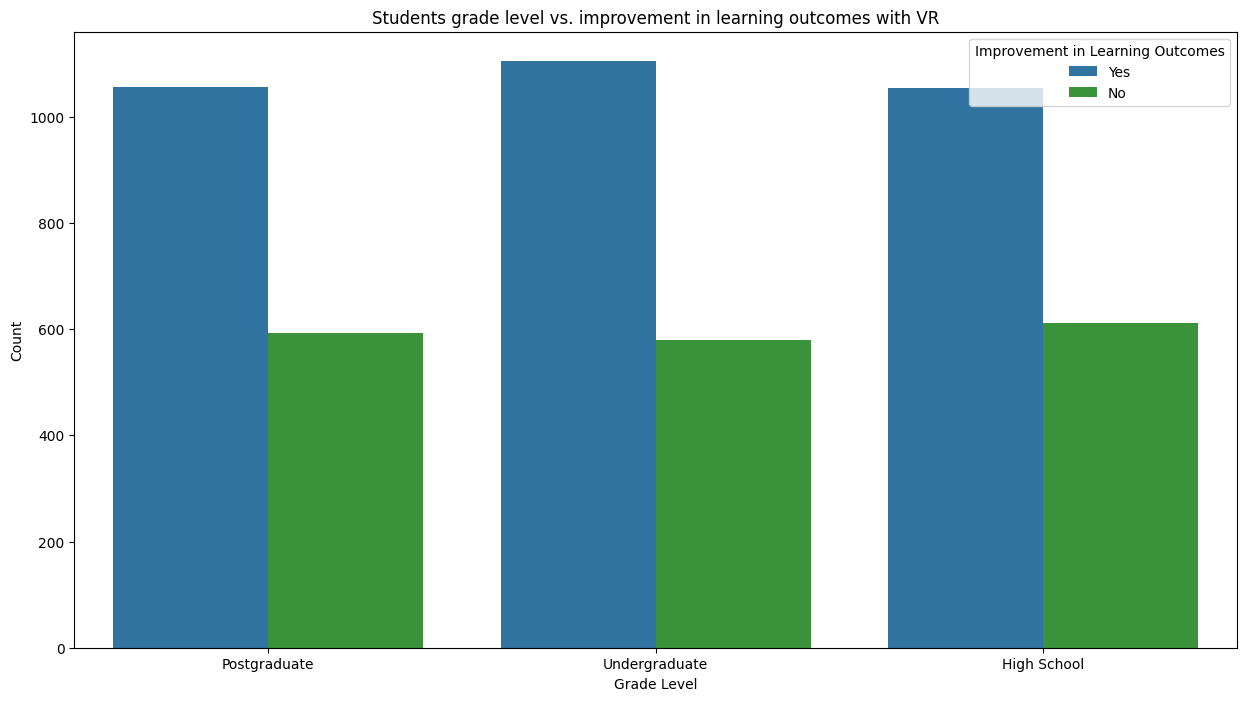

In [ ]:
# 1. Grade Level vs Improvement in Learning Outcomes
plt.figure(figsize=(15,8))
sns.countplot(
    x='Grade_Level',
    hue='Improvement_in_Learning_Outcomes',
    data=df,
    palette=['#1f77b4', '#2ca02c']  # professional blue + green
)
plt.title('Students grade level vs. improvement in learning outcomes with VR')
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.legend(title='Improvement in Learning Outcomes')
plt.show()

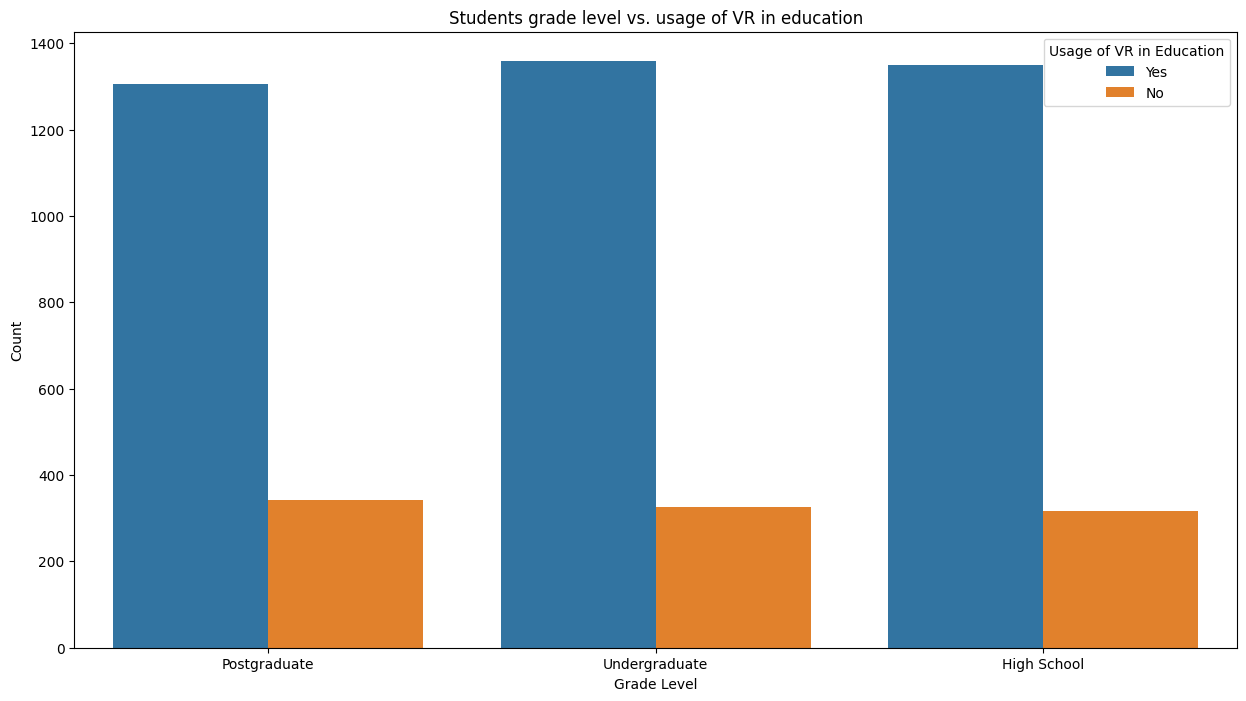

In [ ]:
# 2. Grade Level vs Usage of VR in Education
plt.figure(figsize=(15,8))
sns.countplot(
    x='Grade_Level',
    hue='Usage_of_VR_in_Education',
    data=df,
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Students grade level vs. usage of VR in education')
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.legend(title='Usage of VR in Education')
plt.show()


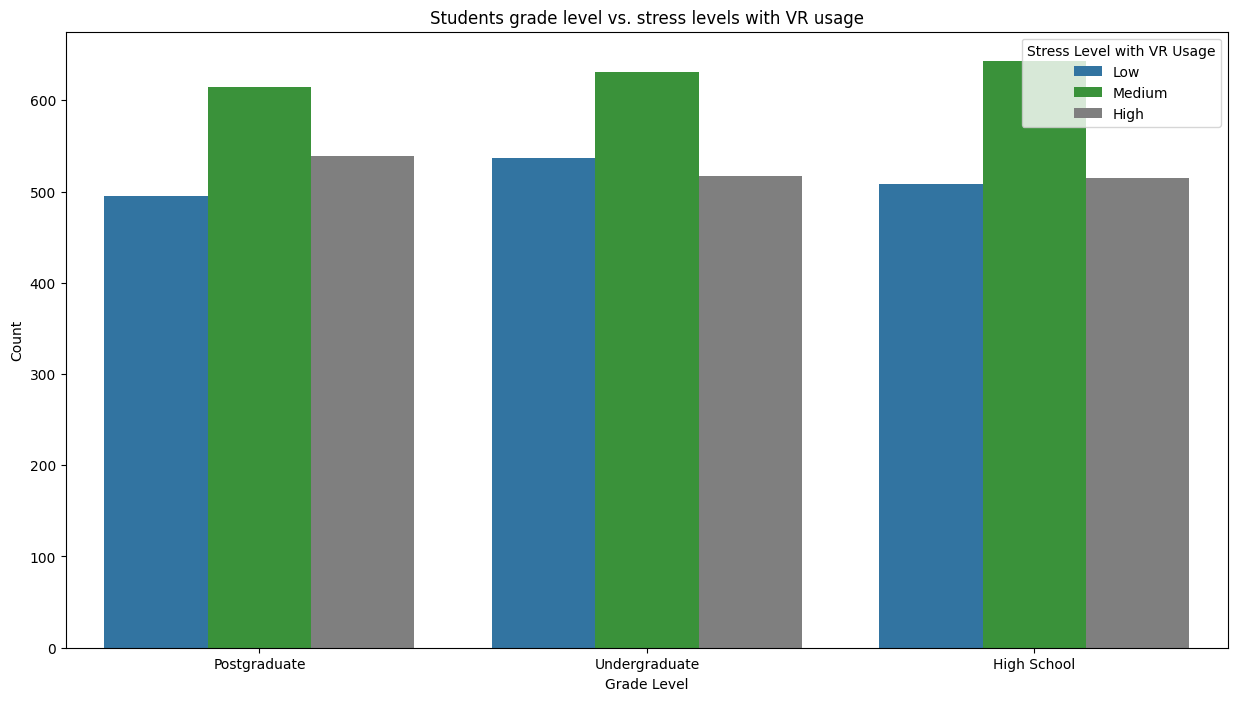

In [ ]:
# 3. Grade Level vs Stress Level with VR Usage
plt.figure(figsize=(15,8))
sns.countplot(
    x='Grade_Level',
    hue='Stress_Level_with_VR_Usage',
    data=df,
    palette=['#1f77b4', '#2ca02c', '#7f7f7f']  # blue, green, grey
)
plt.title('Students grade level vs. stress levels with VR usage')
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.legend(title='Stress Level with VR Usage')
plt.show()

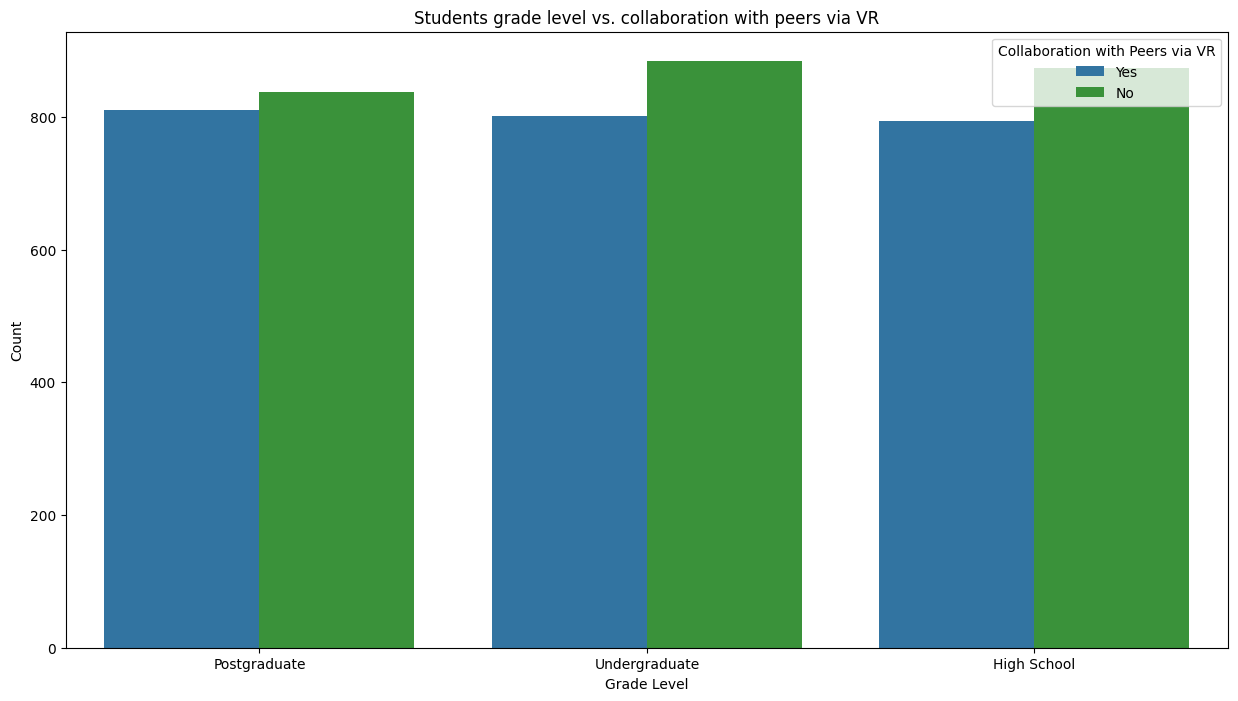

In [ ]:
# 4. Grade Level vs Collaboration with Peers via VR
plt.figure(figsize=(15,8))
sns.countplot(
    x='Grade_Level',
    hue='Collaboration_with_Peers_via_VR',
    data=df,
    palette=['#1f77b4', '#2ca02c']
)
plt.title('Students grade level vs. collaboration with peers via VR')
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.legend(title='Collaboration with Peers via VR')
plt.show()


In [ ]:
print("Improvement_in_Learning_Outcomes:", df['Improvement_in_Learning_Outcomes'].unique())
print("Usage_of_VR_in_Education:", df['Usage_of_VR_in_Education'].unique())
print("Access_to_VR_Equipment:", df['Access_to_VR_Equipment'].unique())
print("Collaboration_with_Peers_via_VR:", df['Collaboration_with_Peers_via_VR'].unique())
print("Grade_Level:", df['Grade_Level'].unique())
print("Instructor_VR_Proficiency:", df['Instructor_VR_Proficiency'].unique())
print("Stress_Level_with_VR_Usage:", df['Stress_Level_with_VR_Usage'].unique())

Improvement_in_Learning_Outcomes: ['Yes' 'No']
Usage_of_VR_in_Education: ['Yes' 'No']
Access_to_VR_Equipment: ['No' 'Yes']
Collaboration_with_Peers_via_VR: ['Yes' 'No']
Grade_Level: ['Postgraduate' 'Undergraduate' 'High School']
Instructor_VR_Proficiency: ['Beginner' 'Intermediate' 'Advanced']
Stress_Level_with_VR_Usage: ['Low' 'Medium' 'High']


In [ ]:
# List of columns to encode (all categorical columns)
categorical_columns = [
    'Improvement_in_Learning_Outcomes',
    'Usage_of_VR_in_Education',
    'Access_to_VR_Equipment',
    'Collaboration_with_Peers_via_VR',
    'Grade_Level',
    'Instructor_VR_Proficiency',
    'Stress_Level_with_VR_Usage'
]

In [ ]:
# Clean the text columns (remove spaces, normalize case)
for col in categorical_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()  # lowercase everything

In [ ]:
# Encode columns and store LabelEncoders to decode later
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Now df has numeric codes
df.head(10)

,Age,Grade_Level,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Instructor_VR_Proficiency,Access_to_VR_Equipment,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR
0,13,1,1,8,5,1,1,0,1,1
1,16,2,0,3,1,0,2,1,1,0
2,15,0,1,0,1,1,0,1,1,0
3,24,1,1,10,4,1,0,0,1,1
4,22,2,1,10,4,0,2,1,1,1
5,28,0,0,4,1,0,0,1,2,1
6,19,2,1,5,1,1,2,1,1,0
7,19,0,1,10,5,1,1,0,2,1
8,29,2,1,3,1,1,0,1,2,0
9,16,1,0,11,4,1,2,1,1,1


In [ ]:
for col, le in label_encoders.items():
    print(f"\nColumn: {col}")
    for i, class_ in enumerate(le.classes_):
        print(f"{i} -> {class_}")


Column: Improvement_in_Learning_Outcomes
0 -> no
1 -> yes

Column: Usage_of_VR_in_Education
0 -> no
1 -> yes

Column: Access_to_VR_Equipment
0 -> no
1 -> yes

Column: Collaboration_with_Peers_via_VR
0 -> no
1 -> yes

Column: Grade_Level
0 -> high school
1 -> postgraduate
2 -> undergraduate

Column: Instructor_VR_Proficiency
0 -> advanced
1 -> beginner
2 -> intermediate

Column: Stress_Level_with_VR_Usage
0 -> high
1 -> low
2 -> medium


In [ ]:
# Calculate quartiles and Interquartile Range (IQR) for my y column
Q1 = df['Age'].quantile(0.20)
Q3 = df['Age'].quantile(0.80)
IQR = Q3 - Q1

# Calculating bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Number of outliers in Age: {len(outliers)}")

# Remove outliers and create cleaned dataframe
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# We do not have any outliers in this dataset.

Number of outliers in Age: 0


# ***Feature selection***

Target variable one for Improvement in Learning Outcomes

In [ ]:
X = df.drop('Improvement_in_Learning_Outcomes', axis=1)
# dropped charges so the other colums can be consided X
y = df['Improvement_in_Learning_Outcomes']
# Set y to be charges
# This is to be done for target variable on which is Improvement_in_Learning_Outcomes

Target variable two for Engagement_Level

In [ ]:
# Features and target
X_1 = df.drop('Engagement_Level', axis=1)
y_1 = df['Engagement_Level']
# This is to be done for target variable on which is Engagement_Level

# ***Training Model (Random Forest Classifier)***

# Target variable one for Improvement in Learning Outcomes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
print('Training set for x train',X_train.shape)
print('Training set for y train',y_train.shape)
print('Testing set for X test',X_test.shape)
print('Testing set for y test',y_test.shape)
# returns the dimensions

Training set for x train (4000, 9)
Training set for y train (4000,)
Testing set for X test (1000, 9)
Testing set for y test (1000,)


In [ ]:
cf = RandomForestClassifier(random_state=42)
cf.fit(X_train, y_train)
# Training our data to do random Forest Classifier

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = cf.predict(X_test)
# We preding y with our x test data

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test,
    'Predicted_Improvement': y_pred
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 

In [ ]:
print( "Classification Report: ")
print( classification_report(y_test, y_pred))
# Provides detail of metrics per class
print( "Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Showcases exact counts of correct/incorrect predictions
print( "Accuracy Score: ", accuracy_score(y_test, y_pred))
# Providessingle overall performance measure

Classification Report: 
              precision    recall  f1-score   support

           0       0.46      0.31      0.37       347
           1       0.69      0.81      0.74       653

    accuracy                           0.64      1000
   macro avg       0.57      0.56      0.56      1000
weighted avg       0.61      0.64      0.61      1000

Confusion Matrix:
[[107 240]
 [125 528]]
Accuracy Score:  0.635


# Target variable two for Engagement_Level

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
print('Training set for x train',X_train_2.shape)
print('Training set for y train',y_train_2.shape)
print('Testing set for X test',X_test_2.shape)
print('Testing set for y test',y_test_2.shape)
# returns the dimensions

Training set for x train (4000, 9)
Training set for y train (4000,)
Testing set for X test (1000, 9)
Testing set for y test (1000,)


In [ ]:
cf_2 = RandomForestClassifier(random_state=42)
cf_2.fit(X_train_2, y_train_2)
# Training our data to do random Forest Classifier

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_2 = cf_2.predict(X_test_2)
# We preding y with our x test data

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_2)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_2,
    'Predicted_Improvement': y_pred_2
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [1 4 1 2 1 4 1 5 1 1 1 4 4 1 5 4 4 5 5 1 1 2 2 1 5 3 1 1 1 1 5 1 4 3 5 4 4
 1 5 4 3 1 3 1 2 2 1 5 4 1 1 5 2 1 4 3 5 1 2 1 1 2 1 1 1 2 1 2 4 4 1 1 4 1
 2 1 5 4 1 3 4 2 5 1 5 5 2 4 1 1 3 1 5 5 3 4 1 1 1 4 1 1 3 1 1 2 1 3 5 1 1
 3 5 2 3 3 1 5 1 1 1 4 1 4 4 1 2 1 1 3 3 1 1 5 1 3 2 3 3 3 3 4 5 1 5 1 1 3
 2 5 2 2 1 1 2 1 3 1 1 4 5 4 5 4 4 4 3 2 1 1 4 2 1 3 4 1 2 2 5 1 1 4 2 1 1
 2 1 5 4 5 2 1 2 1 1 5 1 1 1 1 1 5 2 3 1 5 5 3 1 1 3 4 3 2 1 2 5 5 3 5 4 1
 1 4 4 1 1 1 1 4 4 5 1 4 1 1 2 1 2 1 1 4 4 5 1 1 2 2 2 4 1 5 5 3 5 4 1 3 5
 1 5 2 1 1 5 1 1 2 2 1 3 1 2 3 1 3 1 2 4 1 3 1 4 4 1 1 1 3 5 5 1 3 1 1 3 5
 2 1 5 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 5 4 5 1 4 1 3 1 1 1 3 4 5 5 3 3 3 1 4
 1 1 4 5 1 1 1 1 1 1 3 3 1 2 1 4 2 1 1 5 1 1 1 1 1 5 1 5 4 4 1 2 4 3 1 2 3
 1 3 4 5 5 1 3 1 2 1 1 3 2 1 2 1 2 1 5 3 4 4 4 4 2 2 5 4 5 5 3 2 5 1 3 2 1
 1 1 2 2 5 4 1 5 5 1 5 1 4 4 1 5 1 5 5 1 2 1 1 5 1 1 5 4 1 3 3 3 2 1 1 1 1
 1 5 1 4 5 3 5 3 1 5 1 1 3 1 1 5 5 3 1 1 2 5 4 5 2 1 1 

In [ ]:
print( "Classification Report: ")
print( classification_report(y_test_2, y_pred_2))
# Provides detail of metrics per class
print( "Confusion Matrix:")
print(confusion_matrix(y_test_2, y_pred_2))
# Showcases exact counts of correct/incorrect predictions
print( "Accuracy Score: ", accuracy_score(y_test_2, y_pred_2))
# Providessingle overall performance measure

Classification Report: 
              precision    recall  f1-score   support

           1       0.69      0.81      0.74       366
           2       0.29      0.20      0.24       205
           3       0.42      0.37      0.39       156
           4       0.51      0.58      0.54       109
           5       0.81      0.84      0.83       164

    accuracy                           0.59      1000
   macro avg       0.55      0.56      0.55      1000
weighted avg       0.57      0.59      0.58      1000

Confusion Matrix:
[[295  55  16   0   0]
 [108  42  37  18   0]
 [ 23  42  57  25   9]
 [  0   6  17  63  23]
 [  0   0   9  17 138]]
Accuracy Score:  0.595


# ****Retrain with different parameters(Decision Trees Classifier)****

# Target variable one for Improvement in Learning Outcomes

In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test_dt)

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_dt)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_dt,
    'Predicted_Improvement': y_pred_dt
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 

In [ ]:
print("Classification Report:")
print(classification_report(y_test_dt, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_dt, y_pred_dt))

print("\nAccuracy Score:", accuracy_score(y_test_dt, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.41      0.40       347
           1       0.68      0.67      0.67       653

    accuracy                           0.58      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.58      0.58      0.58      1000


Confusion Matrix:
[[142 205]
 [218 435]]

Accuracy Score: 0.577


# Target variable two for Engagement_Level

In [ ]:
X_train_dt_2, X_test_dt_2, y_train_dt_2, y_test_dt_2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
dt_2 = DecisionTreeClassifier(random_state=42)
dt_2.fit(X_train_dt_2, y_train_dt_2)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt_2 = dt_2.predict(X_test_dt_2)

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_dt_2)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_dt_2,
    'Predicted_Improvement': y_pred_dt_2
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [3 4 2 2 2 3 1 5 1 1 1 4 3 3 5 3 4 4 5 1 1 2 2 2 5 3 2 1 1 1 5 1 4 3 5 4 3
 1 5 4 3 2 3 1 2 2 2 4 4 2 3 5 2 1 5 3 5 1 2 1 1 2 1 1 1 2 1 2 4 4 1 2 4 1
 1 1 5 4 1 3 2 3 5 1 5 5 2 4 1 2 4 1 5 5 2 3 2 1 3 3 2 1 2 1 2 3 1 1 5 1 1
 5 5 2 3 4 2 5 1 1 1 4 1 2 4 1 2 1 1 1 2 1 1 5 2 3 4 3 3 3 1 4 5 1 5 2 1 3
 1 5 1 1 1 2 2 1 3 1 1 4 5 4 5 4 4 4 3 3 1 1 2 2 1 3 4 1 4 1 4 1 1 4 2 1 1
 2 1 5 5 4 2 3 1 1 1 4 1 2 1 1 2 5 1 1 1 5 5 5 1 1 3 4 3 4 1 4 5 5 3 5 2 2
 2 4 4 1 1 1 1 4 4 5 1 4 1 1 2 2 1 1 1 4 4 5 2 1 2 1 2 3 1 5 5 3 5 5 1 3 5
 2 5 2 1 1 5 1 1 2 2 1 3 1 2 2 1 3 1 2 4 1 3 1 2 2 1 1 2 3 5 4 1 2 2 1 4 5
 2 1 5 2 1 3 1 2 2 2 1 1 1 1 2 2 1 2 5 4 5 1 4 1 3 1 1 1 2 5 5 5 3 3 3 2 3
 1 1 4 5 1 1 1 1 2 1 1 2 1 1 1 4 2 1 1 5 1 1 1 1 2 5 1 5 5 5 1 2 4 3 1 1 1
 2 1 4 5 5 1 3 1 2 1 1 3 3 1 2 1 2 1 4 5 4 4 3 2 2 3 5 4 5 4 4 1 5 1 3 2 2
 1 1 2 2 4 4 1 5 5 1 4 1 3 4 1 4 1 5 5 1 2 2 1 5 1 2 5 4 1 2 3 4 1 1 1 1 1
 3 5 1 5 5 4 5 2 1 5 2 1 1 2 1 5 5 2 1 3 3 4 3 5 2 1 2 

In [ ]:
print("Classification Report:")
print(classification_report(y_test_dt_2, y_pred_dt_2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_dt_2, y_pred_dt_2))

print("\nAccuracy Score:", accuracy_score(y_test_dt_2, y_pred_dt_2))

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.76      0.74       366
           2       0.33      0.34      0.33       205
           3       0.36      0.29      0.32       156
           4       0.47      0.47      0.47       109
           5       0.78      0.82      0.80       164

    accuracy                           0.58      1000
   macro avg       0.53      0.54      0.54      1000
weighted avg       0.57      0.58      0.57      1000


Confusion Matrix:
[[279  74  13   0   0]
 [ 76  69  46  14   0]
 [ 28  50  46  19  13]
 [  0  15  19  51  24]
 [  0   0   5  24 135]]

Accuracy Score: 0.58


# ***Retrain with different parameters (KNN)***

# Target variable one for Improvement in Learning Outcomes

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)
# Training the model with KNN classifier.

KNeighborsClassifier()

In [ ]:
y_pred_KNN = knn.predict(X_test_knn)
# Getting our y oredict for our KNN model.

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_KNN)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_knn,
    'Predicted_Improvement': y_pred_KNN
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 

In [ ]:
print( "Classification Report: ")
print( classification_report(y_test_knn, y_pred_KNN))
# Provides detail of metrics per class
print( "Confusion Matrix:")
print(confusion_matrix(y_test_knn, y_pred_KNN))
# Showcases exact counts of correct/incorrect predictions
print( "Accuracy Score: ", accuracy_score(y_test_knn, y_pred_KNN))
# Providessingle overall performance measure

# For the KNN classifier the accuracy score is not very good and is even wores then both the decision tree and random forest classifier accuracy score.


Classification Report: 
              precision    recall  f1-score   support

           0       0.42      0.26      0.32       347
           1       0.67      0.80      0.73       653

    accuracy                           0.62      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.58      0.62      0.59      1000

Confusion Matrix:
[[ 91 256]
 [128 525]]
Accuracy Score:  0.616


# Target variable two for Engagement_Level

In [ ]:
X_train_knn_2, X_test_knn_2, y_train_knn_2, y_test_knn_2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_knn_2, y_train_knn_2)
# Training the model with KNN classifier.

KNeighborsClassifier()

In [ ]:
y_pred_KNN_2 = knn_2.predict(X_test_knn_2)
# Getting our y oredict for our KNN model.

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_KNN_2)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_knn_2,
    'Predicted_Improvement': y_pred_KNN_2
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [2 4 1 1 1 3 1 5 3 1 1 3 3 1 5 3 4 4 5 2 1 2 2 2 5 3 1 1 1 1 3 1 2 3 3 2 3
 2 5 5 3 2 2 1 2 2 2 3 4 1 2 5 1 1 4 2 5 1 1 1 1 2 1 1 1 2 1 1 4 3 1 2 4 1
 1 1 3 4 2 3 2 1 5 1 5 5 2 4 1 2 5 1 5 5 2 5 1 1 2 3 2 1 3 1 1 2 1 3 5 1 2
 3 5 2 3 4 2 5 1 1 1 4 1 2 4 1 2 1 1 1 1 1 1 5 1 3 2 3 3 3 1 4 5 1 4 2 1 1
 1 5 1 1 1 1 2 1 4 1 1 4 5 4 4 5 2 4 3 2 1 1 4 3 1 3 3 1 2 1 5 2 1 3 2 1 1
 2 1 5 4 5 2 3 1 1 1 4 1 1 1 1 1 5 2 3 1 5 5 5 1 1 3 3 3 2 1 3 5 5 1 5 4 1
 2 4 2 1 1 1 1 3 3 5 1 3 1 2 1 1 3 1 1 2 3 5 1 1 2 1 2 4 1 5 3 3 5 4 1 2 4
 1 5 2 1 2 5 1 1 1 2 1 3 1 1 2 2 3 1 1 4 1 3 1 4 4 1 3 2 1 5 5 1 3 1 1 4 5
 3 1 5 2 1 1 1 2 1 2 1 1 1 1 2 2 1 2 5 4 5 1 4 1 3 1 1 2 3 5 5 5 1 3 3 1 2
 1 1 4 4 1 1 1 1 1 1 1 2 1 2 1 4 1 1 1 5 1 2 1 1 1 5 1 5 3 4 1 2 5 3 1 1 1
 1 1 2 5 5 1 1 1 1 1 1 3 3 1 1 2 2 1 4 3 4 3 3 2 1 3 5 3 5 5 3 2 5 1 1 2 1
 1 1 2 1 3 4 1 5 5 1 4 1 4 4 1 5 1 5 4 1 2 1 1 5 1 1 4 2 1 2 3 5 2 1 1 1 1
 1 5 1 5 5 2 5 2 1 5 1 1 1 1 1 5 5 1 1 1 1 5 3 5 1 1 1 

In [ ]:
print( "Classification Report: ")
print( classification_report(y_test_knn_2, y_pred_KNN_2))
# Provides detail of metrics per class
print( "Confusion Matrix:")
print(confusion_matrix(y_test_knn_2, y_pred_KNN_2))
# Showcases exact counts of correct/incorrect predictions
print( "Accuracy Score: ", accuracy_score(y_test_knn_2, y_pred_KNN_2))
# Providessingle overall performance measure

# For the KNN classifier the accuracy score is not very good and is even wores then both the decision tree and random forest classifier accuracy score.

Classification Report: 
              precision    recall  f1-score   support

           1       0.67      0.85      0.75       366
           2       0.37      0.32      0.34       205
           3       0.38      0.28      0.32       156
           4       0.38      0.30      0.34       109
           5       0.81      0.77      0.79       164

    accuracy                           0.58      1000
   macro avg       0.52      0.51      0.51      1000
weighted avg       0.55      0.58      0.56      1000

Confusion Matrix:
[[311  46   9   0   0]
 [110  65  22   8   0]
 [ 44  41  44  22   5]
 [  1  23  28  33  24]
 [  0   0  14  23 127]]
Accuracy Score:  0.58


# ***Retrain with different parameters (Logistic Regression )***

# Target variable one for Improvement in Learning Outcomes

In [ ]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
LR = LogisticRegression()
LR.fit(X_train_LR, y_train_LR)
# Training the model with Logistic Regression.

LogisticRegression()

In [ ]:
y_pred_LR = LR.predict(X_test_LR)
# Getting our y oredict for our Logistic Regression.

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_LR)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_LR,
    'Predicted_Improvement': y_pred_LR
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 

In [ ]:
print( "Classification Report: ")
print( classification_report(y_test_LR, y_pred_LR))
# Provides detail of metrics per class
print( "Confusion Matrix:")
print(confusion_matrix(y_test_LR, y_pred_LR))
# Showcases exact counts of correct/incorrect predictions
print( "Accuracy Score: ", accuracy_score(y_test_LR, y_pred_LR))
# Providessingle overall performance measure

# For the Logistic regression it seems this classification has the best outcome in terms of accuracy score.

Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.29      0.38       347
           1       0.70      0.89      0.78       653

    accuracy                           0.68      1000
   macro avg       0.64      0.59      0.58      1000
weighted avg       0.66      0.68      0.64      1000

Confusion Matrix:
[[ 99 248]
 [ 73 580]]
Accuracy Score:  0.679


# Target variable two for Engagement_Level

In [ ]:
X_train_LR_2, X_test_LR_2, y_train_LR_2, y_test_LR_2 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# Training my model by spliting it 80% training data and 20% test data

In [ ]:
LR_2 = LogisticRegression()
LR_2.fit(X_train_LR_2, y_train_LR_2)
# Training the model with Logistic Regression.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_LR_2 = LR_2.predict(X_test_LR_2)
# Getting our y oredict for our Logistic Regression.

In [ ]:
# Show predicted values
print("Predicted Improvement in Learning Outcomes:\n", y_pred_LR_2)

# Compare predicted vs actual values in a dataframe
comparison = pd.DataFrame({
    'Actual_Improvement': y_test_LR_2,
    'Predicted_Improvement': y_pred_LR_2
})

# Show first 10 rows
print(comparison.head(10))

Predicted Improvement in Learning Outcomes:
 [4 3 1 2 1 4 1 5 2 1 1 2 3 1 5 3 3 5 5 1 1 1 1 2 5 2 1 1 1 1 3 1 3 3 5 2 3
 1 5 5 3 1 2 1 1 2 1 5 4 1 3 5 1 1 4 3 5 1 2 2 1 1 1 1 1 2 1 1 4 3 1 1 5 1
 1 1 3 2 2 3 4 1 5 1 5 5 2 5 1 1 4 1 5 5 3 4 1 1 3 4 1 1 2 1 1 4 1 2 5 1 2
 5 5 2 2 3 1 5 1 2 1 3 1 2 3 1 1 1 1 1 2 1 2 5 2 4 2 5 4 3 1 3 5 1 4 2 1 1
 1 5 4 2 1 2 4 1 4 1 1 4 3 2 5 4 2 3 1 3 1 1 4 3 1 3 5 1 5 1 5 2 2 3 2 1 2
 2 2 5 4 4 1 2 1 1 1 4 1 1 1 1 2 5 2 2 1 5 5 3 1 1 3 2 3 3 1 3 4 5 3 5 3 1
 3 3 2 1 1 1 1 4 3 5 4 2 1 2 2 1 1 1 2 2 3 5 1 1 4 1 2 2 1 5 5 2 5 3 1 2 4
 1 5 3 1 2 5 1 1 1 3 1 3 1 2 3 1 3 1 1 3 2 2 1 2 3 1 2 1 2 5 4 1 3 1 1 5 5
 3 1 5 2 1 1 1 3 1 1 1 2 1 1 2 4 1 3 5 4 5 1 3 1 3 1 1 1 3 4 5 5 1 3 5 1 3
 1 1 5 5 1 1 1 1 1 1 1 4 1 4 1 5 3 1 1 5 2 2 1 1 1 5 1 4 3 5 1 4 4 4 1 2 1
 1 2 3 5 5 1 1 1 1 1 1 3 4 1 2 2 4 1 5 4 4 4 4 4 1 3 5 2 5 5 4 2 4 2 1 2 1
 1 1 3 1 5 3 1 5 5 1 5 1 2 2 1 5 1 5 5 1 3 1 1 4 1 1 5 3 1 2 3 4 2 1 1 1 1
 1 5 1 4 5 3 5 3 1 5 1 2 1 2 1 5 5 2 1 2 1 5 2 5 2 1 1 

In [ ]:
print( "Classification Report: ")
print( classification_report(y_test_LR_2, y_pred_LR_2))
# Provides detail of metrics per class
print( "Confusion Matrix:")
print(confusion_matrix(y_test_LR_2, y_pred_LR_2))
# Showcases exact counts of correct/incorrect predictions
print( "Accuracy Score: ", accuracy_score(y_test_LR_2, y_pred_LR_2))
# Providessingle overall performance measure

# For the Logistic regression it seems this classification has the best outcome in terms of accuracy score.

Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.90      0.81       366
           2       0.40      0.28      0.33       205
           3       0.39      0.36      0.38       156
           4       0.33      0.30      0.32       109
           5       0.81      0.80      0.80       164

    accuracy                           0.61      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.58      0.61      0.59      1000

Confusion Matrix:
[[331  25   7   3   0]
 [ 97  57  33  18   0]
 [ 24  42  56  22  12]
 [  0  20  37  33  19]
 [  0   0   9  24 131]]
Accuracy Score:  0.608
